In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('Mg database for students.xlsx')

In [4]:
df.head()

,Time (min),Scanspeed (mm/s),Fluence (J/cm2),DLS (nm),UV VIS
0,7,3240,1.875040,151.960143,0.722291
1,25,3152,1.882903,114.440890,1.891808
2,9,3137,1.902242,170.006049,0.722291
3,8,3400,1.894592,142.525020,0.702770
4,5,3371,1.907519,170.006049,0.702770


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time (min)        1330 non-null   int64  
 1   Scanspeed (mm/s)  1330 non-null   int64  
 2   Fluence (J/cm2)   1330 non-null   float64
 3   DLS (nm)          1330 non-null   float64
 4   UV VIS            1330 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 52.1 KB


In [ ]:
df.describe()

,Time (min),Scanspeed (mm/s),Fluence (J/cm2),DLS (nm),UV VIS
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,13.415038,3257.492481,1.869019,133.308118,0.739947
std,7.200812,145.360144,0.023969,25.906786,0.284710
min,2.000000,3000.000000,1.830000,52.700000,0.219000
25%,7.000000,3131.250000,1.848227,114.440890,0.702770
50%,14.000000,3254.000000,1.869151,136.331734,0.702770
75%,20.000000,3379.750000,1.889668,151.960143,0.722291
max,25.000000,3500.000000,1.910000,239.800000,2.541000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.columns

Index(['Time (min)', 'Scanspeed (mm/s)', 'Fluence (J/cm2)', 'DLS (nm)',
       'UV VIS'],
      dtype='object')

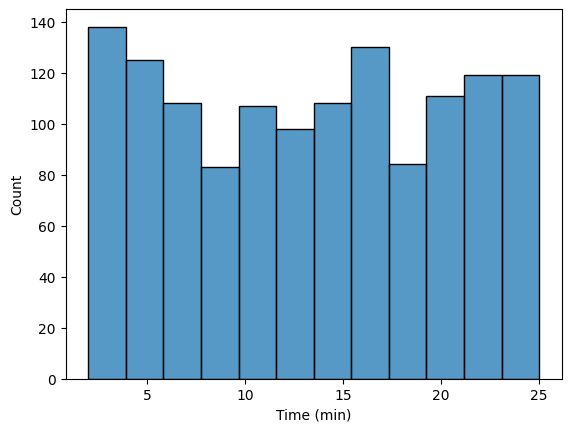

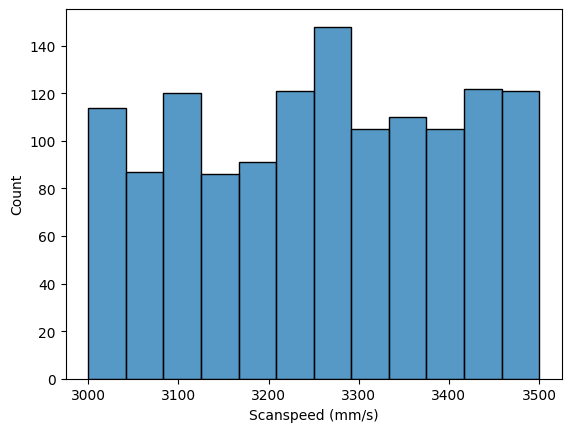

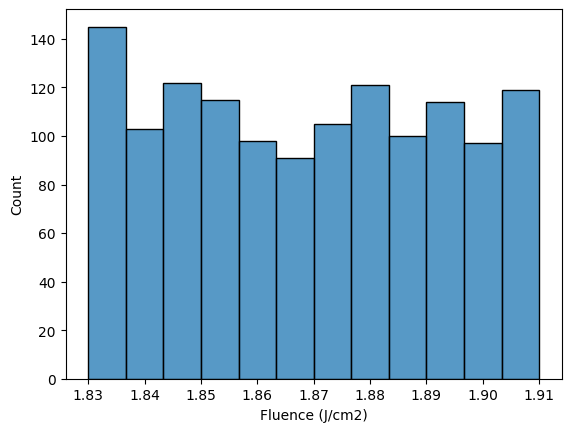

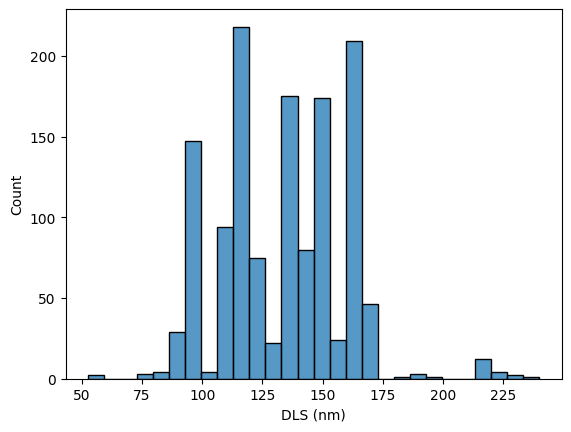

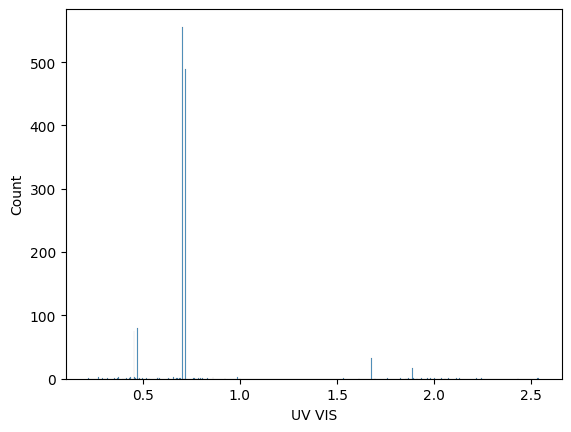

In [8]:
for col in df.columns:
    sns.histplot(df[col])
    plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
target_features = df[['DLS (nm)', 'UV VIS']]

scaler = StandardScaler()
target_features_scaled = scaler.fit_transform(target_features)

In [ ]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(target_features_scaled)
    inertia.append(kmeans.inertia_)

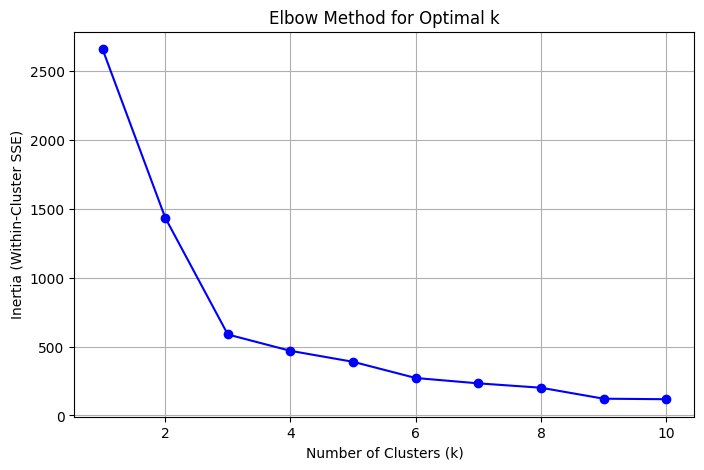

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(target_features_scaled)

In [58]:
df.head()

,Time (min),Scanspeed (mm/s),Fluence (J/cm2),DLS (nm),UV VIS,Cluster
0,7,3240,1.875040,151.960143,0.722291,2
1,25,3152,1.882903,114.440890,1.891808,1
2,9,3137,1.902242,170.006049,0.722291,2
3,8,3400,1.894592,142.525020,0.702770,2
4,5,3371,1.907519,170.006049,0.702770,2


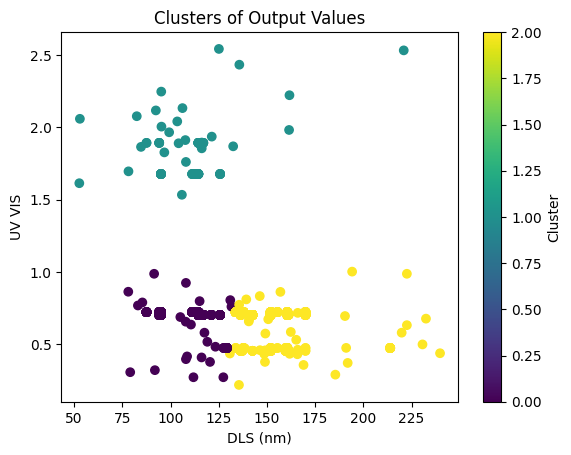

In [59]:
plt.scatter(df['DLS (nm)'], df['UV VIS'], c=df['Cluster'])
plt.xlabel('DLS (nm)')
plt.ylabel('UV VIS')
plt.title('Clusters of Output Values')
plt.colorbar(label='Cluster')
plt.show()

In [60]:
# Presicting cluster for new data
kmeans.predict(scaler.transform([[151.960143, 0.722291]]))

array([2], dtype=int32)

In [61]:
# Getting best settings for a required DLS and UV VIS
def recommend_settings(dls, uvvis):
    cluster_id = kmeans.predict(scaler.transform([[dls, uvvis]]))[0]
    cluster_data = df[df['Cluster'] == cluster_id]

    mean_inputs = cluster_data[['Time (min)', 'Scanspeed (mm/s)', 'Fluence (J/cm2)']].mean()
    
    cluster_data['output_distance'] = cluster_data.apply(
        lambda row: ((row['DLS (nm)'] - dls) ** 2 + (row['UV VIS'] - uvvis) ** 2) ** 0.5,
        axis=1
    )
    best_match = cluster_data.sort_values('output_distance').iloc[0][['Time (min)', 'Scanspeed (mm/s)', 'Fluence (J/cm2)']]
    
    return {
        'mean_recommendation': mean_inputs.to_dict(),
        'best_match_recommendation': best_match.to_dict()
    }

In [62]:
recommend_settings(100, 0.5)

{'mean_recommendation': {'Time (min)': 18.705882352941178,
  'Scanspeed (mm/s)': 3261.9259962049337,
  'Fluence (J/cm2)': 1.871251195217944},
 'best_match_recommendation': {'Time (min)': 19.0,
  'Scanspeed (mm/s)': 3333.0,
  'Fluence (J/cm2)': 1.840419083109571}}